In [20]:

import pandas as pd
from typing import Callable
import matplotlib.pyplot as plt
import numpy as np
from numpy import array as arr
import skopt as sk
flow_stats= pd.read_csv('../data/output/aggregated/flow_stats.csv')

dataframes = pd.read_excel(
    '~/Desktop/All_Validation_Data_w_Sensi_Anal.xlsx',
#     "../data/validation_data/all_validation_data.xlsx",
    sheet_name=None,
)


/tmp/ipykernel_5923/1240047531.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flow_data[angle_col].replace('-1.3.', '1.3', inplace=True)


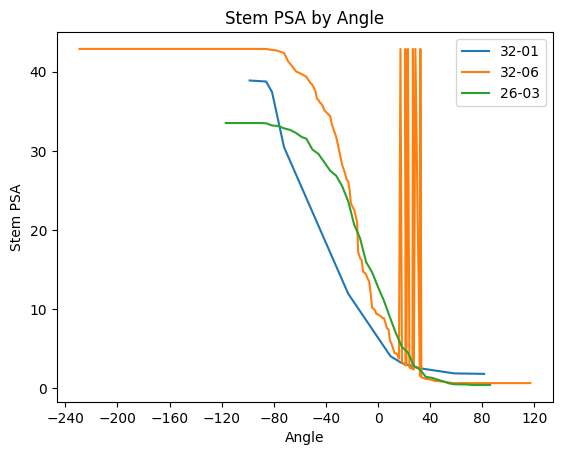

In [55]:
from decimal import Decimal

trees_to_exclude =[ '32-01','32-06','26-03']


# flow_data = flow_stats
# angle_col = 'angle_'

flow_data = dataframes['Sens_anal']
angle_col = 'Angle (Degrees)'

flow_data[angle_col].replace('-1.3.', '1.3', inplace=True)

flow_data[angle_col] = flow_data[angle_col].astype(float)

import matplotlib.pyplot as plt

# Filter the flow_data dataframe for the trees you want to plot
trees_to_plot = ['32-01', '32-06', '26-03']
# trees_to_plot=set(flow_data['tree_codes'])

filtered_data = flow_data[flow_data['tree_codes'].isin(trees_to_plot)]

# fig, ax = plt.subplots()
filtered_data = filtered_data.sort_values(by=angle_col)



# Plot the stem_psa by angle for each tree
for tree in trees_to_plot:
    # print(tree, tree_data[angle_col]) 
    tree_data = filtered_data[filtered_data['tree_codes'] == tree]
    tree_data.sort_values(by=angle_col)
    # print(f"{tree_data[angle_col]=}, {tree_data['stem_psa']=}")
    plt.plot(tree_data[angle_col], tree_data['stem_psa'], label=tree)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10)) 
# plt.yticks([10, 20, 30, 40, 50]) 
# Set the plot title and labels
plt.title('Stem PSA by Angle')
plt.xlabel('Angle')
plt.ylabel('Stem PSA')


# Add a legend
plt.legend()

# Show the plot
plt.show()




In [1]:
import pandas as pd
import numpy as np
from skopt import gp_minimize
from skopt import Optimize
from skopt.space import Real
from skopt.utils import use_named_args
import sys

print(sys.path)

sys.path.append('/code/code/canopyHydrodynamics/')
print(sys.path)


# test_read= pd.read_csv('../data/output/aggregated/flow_stats.csv')
# print('here')

data= pd.read_csv('../data/output/aggregated/OptiSf.csv')

# Load your data
# data = pd.read_csv('../data/output/aggregated/OptSf.csv')


# List of tree codes you're optimizing for
tree_codes = ['Zse', 'Lst', 'Apl', 'Bpa', 'Nsy', 'Gdi', 'Uam', 'Cja', 'Ure', 'Coc', 'Aru', 'Tco']

# Define the space of angles, one for each tree code
angle_space = [Real(-0.5, 0.5, name=f"angle_{code}") for code in tree_codes]

# Define the objective function that calculates the negative correlation to minimize
@use_named_args(angle_space)
def objective(**angles):
    combined_s_data = pd.Series(dtype=float)
    combined_r_data = pd.Series(dtype=float)

    for code in tree_codes:
        angle = angles[f"angle_{code}"]
        s_col = f"{code}-Y"
        r_col = f"{code}-R"

        # Filter data for the specific angle
        angle_data = data[(data['A'] >= angle - 0.01) & (data['A'] <= angle + 0.01)]

        if not angle_data.empty:
            s_value = angle_data[s_col].dropna()
            r_value = angle_data[r_col].dropna()

            if not s_value.empty and not r_value.empty:
                combined_s_data = pd.concat([combined_s_data, s_value])
                combined_r_data = pd.concat([combined_r_data, r_value])

    if len(combined_s_data) > 1 and len(combined_r_data) > 1:
        corr = np.corrcoef(combined_r_data, combined_s_data)[0, 1]
        return -corr  # Minimize the negative correlation
    else:
        return 0  # Neutral value if insufficient data

# Perform the optimization
result = gp_minimize(objective, angle_space, n_calls=50, random_state=0)

# Results
best_corr = -result.fun  # Best correlation found
best_angles = result.x   # Best angles found

print("Best correlation:", best_corr)
print("Best angles:", best_angles)

Best correlation: 1.0
Best angles: [-0.10721520389917016, 0.33607876353737776, -0.16260383958273156, 0.1481718720511973, -0.13175846015945197, 0.4571551589530466, -0.35964921958735485, 0.3700872583584366, -0.026391954726289413, 0.30091075197964445, 0.020477479551204936, 0.1788795301189604]

SyntaxError: invalid syntax (2155333368.py, line 67)

In [15]:
print(tree_codes)
# print("Best angles:", best_angles)
print("Best angles:", best_angles)

['Zse', 'Lst', 'Apl', 'Bpa', 'Nsy', 'Gdi', 'Uam', 'Cja', 'Ure', 'Coc', 'Aru', 'Tco']
Best angles: [-0.10721520389917016, 0.33607876353737776, -0.16260383958273156, 0.1481718720511973, -0.13175846015945197, 0.4571551589530466, -0.35964921958735485, 0.3700872583584366, -0.026391954726289413, 0.30091075197964445, 0.020477479551204936, 0.1788795301189604]
